# Assignment 2

This notebook was created by Tyler Teufel, and is broken down by each question, containing all code required as well as the individual reports for each question.

## Data import disclaimer:

I used the mount google drive function in colab in order to prevent having to continually reupload the data. I included the lines I used to pull data from the path within my drive. I have left them commented out so that this can easily be tested by simply uploading as well.

## Disclaimer on how AI was utilized:

I utilized OpenAI's GPT-4o model to explain in depth the mathematics behind many of the concepts covered in this project. I documented most of the helpful explainations in a GitHub repo I have been working on for my own portfolio, which I will link below. I also used it to help me brainstorm an approach for answering the questions, by breaking down the questions into each individual thing being asked, as well as what packages are typically used to accomplish these tasks given that I am not previously familiar with the capabilities of Tensorflow or sklearn. I also would like to mention that whenever I found myself stuck or making no progress, I did use ChatGPT to troubleshoot what was going wrong, and got suggestions of how I can work around the problem or work through it. Overall I gained a lot of valuable knowledge through discussions of why certain parts needed to be done in the way that they have, most notably surrounding connecting the calculus concepts to machine learning, as in the past I have found myself struggling to tie these together conceptually.

https://github.com/tyler-teufel/ML-Notebooks/blob/assignment-2/Notes/ChatGPT-Generated/understanding_calculus_in_ml_ai.md

## Question 1

**Question:**

*Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for  regression using the Mean Square Error loss. Assume that you are  using the Sigmoid activation function for the hidden layer. Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.*


### Report:

In order to derive the update rule for the neural network, lets first consider its structure. The neural network that is to be trained can be broken down to just one hidden layer, and one output layer, making up its 2-layer structure. The input layer will take in the respective features from the feature vector, and send them to the hidden layer where the weighted sum of the input features is taken, followed by the application of the sigmoid application function to this weighted sum at the neuron such that it can be correctly mapped to the output layer once the data has been squashed down to a value between 0 and 1. Once the transformed data has been transformed, it becomes the 'input' terms for the output layer. These values are then used to calculate a linear combinated given either the randomly generated weights and biases for the output layers, or the learned weights and biases, depending on if this is the first instance of forward pass or not. Once completed, the outputed value from the linear combination, is the predicted value that our neural network has produced. This can then be used to compute the mean squared error by utilizing the function

\[
J(\theta) = \frac{1}{2} (y - \hat{y})^2
\]

With this value, we can now pivot to the derivation of the update rule, for training the neural network with backpropagation for this regression. The first step is to compute the gradient of the loss, with respect to the prediction. For calculating the gradient, we take the derivative of the mean squared error loss function:

\[
  \frac{dJ}{d\hat{y}} = \frac{d}{d\hat{y}}(\frac{1}{2}(y - \hat{y})^2) = -(y - \hat{y})
\]

By computing the derivative, we have essentially found the rate of change for MSE loss, which is our gradient for the loss function. The next step will be to compute the gradients with respect to the weight and with respect to the bias, respectively, for the output layer such that they can be adjusted accordingly in the training process.

The next step is to move onto the hidden layer, where we begin by taking the gradient of the loss function with respect to the hidden layer output. Lets represent the hidden layer output with \(a_h\), and the gradient as \(\frac{\partial J}{\partial a_h}\), which can be computed using the chain rule by finding the product of the gradient of the loss function with respect to the predicted value, and the gradient of the predicted value with respect to the hidden layer output value.

 You can start to see the pattern here- we are continuing to propogate back through each layer and compute the the gradients for each function at each layer, thus improving and training the data. This process is repeated continually using the chain rule, taking the gradient of the loss function with respect to the hidden layers weighted input value to the activation function, and then the weights and biases here. Through calculating all of these gradients, we can very easily plug in for each step of the update rules for each layers weights and biases:

 \[
w_i := w_i - \alpha \frac{\partial J}{\partial w_i}
\]

where \(w_i\) represents the weight i to be updated at the layer  that we are updating. This backwards pass through the neural network finds the gradients of each function with respect to its input, and calculates how it should be adjusted such that we can identify the relationship between the data being studied.

### How is this different from the network trained for binary classification with log loss?

The biggest difference to identify here is that, since we are using a regular regression in the initial network, there is no activation function being computed on the output layer, so the produced predicted value is a continuous value, representing an actual value as opposed to a binary classification, where the output is literally classifying the input as something.

With this in mind, we also are using a different loss function, which will produce different gradients. the MSE loss function is computing the difference between the predicted value and the output value, whereas the log loss function is computing the difference between the predicted probability / classification, and the true classification. We are essentially diverting between comparing continuous values in one instance, and probabilitiies in another. On one hand, we are updating based upon the magnitude of error, whereas on the other hand we are updating based upon probability differences, leading to differing behaviors.




## Question 2

For the given data on  Canvas, construct a neural network for the regression task. Your network must have 1 hidden  layer  and  1  output  layer.  Use  sigmoid  to  be  your  activation  function  for  the  hidden  layer(s).  You  can choose the number of neurons in each layer using your intuition.

The data is already split to have your input data for training (X_train.csv) and testing (X_train.csv) and their corresponding target values Y_train.csv and Y_test.csv, respectively. You can load the data using NumPy as follows:

```python
X_train = np.loadtxt("X_train.csv")
```

Implement the backpropagation algorithm and train your network until convergence.

Answer the following questions:
1. What is the activation function that you will choose for the output layer? Justify your answer briefly.

<br>

2. How many neurons should there be in the output layer? Why?

<br>

3. Report the average MSE loss and the accuracy.

<br>

4. Plot the loss and accuracy as a function of the number of iterations.

<br>

5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

<br>

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:
   <br>
   
   a. You  will  need  to  vary  the  number  of  neurons  from  1  to  10.  Does  the  update  rule  need  to  be changed/derived again? Why or why not?
   
   <br>

   b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

<br>

7. What is the  effect of the activation functions in the  network?  Explore two different  activation functions other than sigmoid such as tanh, linear, or ReLU.

    a. Will you need to change the update rule?

    <br>

    b. What is the change that you need to make to achieve this experiment?

    <br>

    c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

<br>

8. Split the training data into training and validation set and apply early stopping criteria.

    a. How the training and validation loss changes as you change the “patience” in early stopping?

    b. Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.


9. Implement another regularization technique for neural network as discussed in the class.

    Compare and contrast with early stopping and your chosen regularization technique.
Which one would you prefer for this dataset setting? Justify your answer.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 5509.8223 - val_loss: 5597.2705
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5802.8560 - val_loss: 5570.4463
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5669.5928 - val_loss: 5548.0737
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5177.7070 - val_loss: 5525.8027
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5522.2925 - val_loss: 5497.7026
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5259.0996 - val_loss: 5469.8643
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5385.9321 - val_loss: 5435.4106
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5694.4253 - val_loss: 5398.3936
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5108.9053 - val_loss: 5358.5977
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5520.5054 - val_loss: 5316.5518
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5470.1118 - val_loss: 5277.3618
Epoch 12/100
4/4 ━━━

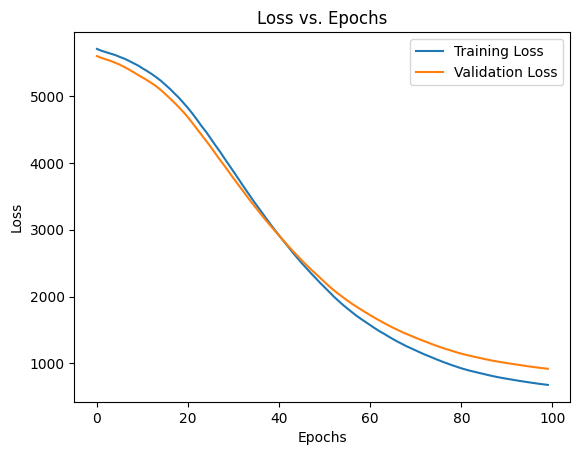

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mean Absolute Error: 17.448559985815177
Accuracy: 0.47330689701240014
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 5613.0713 - val_loss: 5614.6348
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5498.7417 - val_loss: 5611.5073
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5602.3018 - val_loss: 5608.3848
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5897.7954 - val_loss: 5605.5938
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5802.3071 - val_loss: 5603.3823
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5823.6411 - val_loss: 5600.8213
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5844.4448 - val_loss: 5599.0371
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5256.6460 - val_loss: 5596.9614
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5559.6074 - val_loss: 5594.1411
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5394.3208 - val_loss: 5

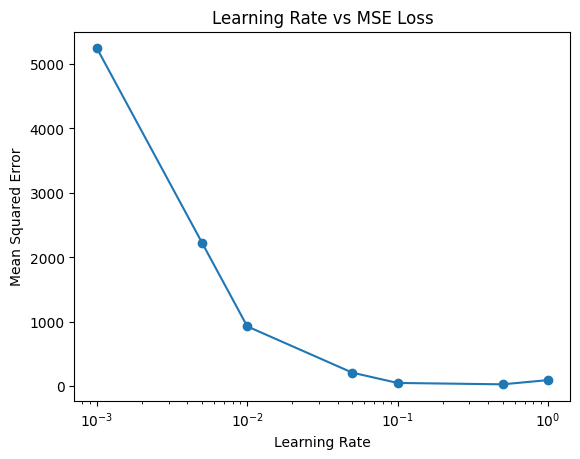

In [15]:
# All imports used. Keras through tensorflow is leveraged, along with
# Numpy, matplot, and sklearn.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Import the data from google drive
# X_train = np.loadtxt("/content/drive/MyDrive/COMP-5630/Assignment-2/X_train.csv")
# Y_train = np.loadtxt("/content/drive/MyDrive/COMP-5630/Assignment-2/Y_train.csv")
# X_test = np.loadtxt("/content/drive/MyDrive/COMP-5630/Assignment-2/X_test.csv")
# Y_test = np.loadtxt("/content/drive/MyDrive/COMP-5630/Assignment-2/Y_test.csv")

X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")


# This step creates the actual network, where the layers are stacked as they're added.
network_model = Sequential()

# Next, we nee to add in the hidden layer. Lets start with 50 neurons, and
# Making the weight dimensions needed based upon the amount of features.
# Of course, we also need to specify that the activation function is sigmoid.
network_model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
network_model.add(Dense(1))

# Next, we need to set the optimization algorithm to be Adam, which
# based upon basic research is one of the more widely used algorithms
# For updating the networks weights depending on the gradients and learning
# rates during training.
# We also specify the learning rate and loss function to be used.
network_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# This step is the training of the data, where we specifiy that the training
# Data is to be split up into 32 samples for each weight update, with the model
# going through the entirety of the training data a total of 100 times.
# The validation data argument simple is inputing the actual outcome data
# For evaluating performance insight at the end of each epoch for generalizing
# this new data.
model_history = network_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Next, we need to actually evaluate the model's performance based upon the test
# data after training, by calculating the loss that has been calculated from MSE
# for the test data.
loss = network_model.evaluate(X_test, Y_test)
print("Test Loss:", loss)

# Plotting the model

plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Computing the accuracy based upon the Mean absolute error.
Y_pred = network_model.predict(X_test)

mae = np.mean(np.abs(Y_test - Y_pred.flatten()))
print("Mean Absolute Error:", mae)

accuracy = np.abs(1 - (mae / np.mean(Y_test)))
print("Accuracy:", accuracy)





## Question 2 Report Questions

1. **What is the activation function that you will choose for the output layer? Justify your answer briefly.**

  The activation function to be used for the output layer will be a linear function, given that this is a regression. Due to the fact that this regression is looking to output a continuous value, we do not need to perform regularization on the output value since we are not performing a classification.

2. **How many neurons should there be in the output layer? Why?**

  There should only be one neuron in the output layer, due to the fact that we are only looking to produce a single continuous value, not multiple. We would use multiple neurons if we were performing something like a multi-classification problem, where we may need a few different outcomes in one go.

3. **Report the average MSE loss and the accuracy.**

  The average MSE loss was reported to be about 1208.84.

  We can compute the accuracy in this context by taking the mean absolute error, which computes the absolute value of the error before squaring the values, and dividing it by the average result of the test data and subtracting that value from 1 to get an estimate of what percentage of predictions were infact considered to be accurate.

4. **Plot the loss and accuracy as a function of the number of iterations.**

  See the outputted graph.

5. **What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.**

  A way we can utilize the intuitive nature of python to test out a variety of learning rates would be to create a list with the learning rates we are looking to test, as well as an empty list that will contain the loss values computed. From here, we will iterate through the learning rates and train the data with the learning rate plugged into the optimizer function, and append the calculated loss to the loss list. We can plot these as a comparison of the learning rate and the losses computed. See the graph generated from this implementation.

6. **What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:**


  **a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?**

  Based upon the way that the backpropagation algorithm works, we will not need to change the update rule as regardless of the number of neurons the gradient will be computed the same way for all neurons. The only influence that altering the number of neurons has is on level of complexity in a relationship that can be analyzed.

  **b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**

As shown in the graph below, the loss calculated for each amount of neurons between 1 and 10 appears to go down. You can also see the comparison of the predicted and actual loss values for each iteration as well. As we can see, the more neurons, the better the relationship can be represented




7. **What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.**

**a. Will you need to change the update rule?**

No, the update rule will not need to be changed, as gradients are still being taken at each neuron. The only difference will be in how the data is displayed and analyzed given that the differing activation functions will compute different values. Relu does well by eliminating the vanishing gradient problem, and tanh is also beneficial since it centers around 0.

**b. What is the change that you need to make to achieve this experiment?**

The changes just consisted of going three each of the three different activation functions and training the data based upon each activation function.

**c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**

See the outputted values and graphs below.


8. **Split the training data into training and validation set and apply early stopping criteria.**

a. **How the training and validation loss changes as you change the “patience” in early stopping?**

As we can see from the produced graphs, the higher the patience level, the more epochs that are evaluated. The gaps seem to be trending towards less loss with an increase in patience.

b. **Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.**

Based upon the model graph, in all honesty the data looks to be pretty balanced considering that as the patience level increases, the training data decreases in loss, and the validation data slightly increases in loss but mostly plateaus.




9. **Implement another regularization technique for neural network as discussed in the class.**

**Compare and contrast with early stopping and your chosen regularization technique. Which one would you prefer for this dataset setting? Justify your answer.**

I implemented L2 regularization after doing research on how it is usually done using tensorflow. Based upon the resulting epochs and loss computed versus the loss calculated using early stopping, it is clear that L2 regularization is far more accurate in comparison to early stopping with a patience fo 10. Early stopping causes the data to stop analysis when it reaches epoch 11 with a loss value of 5807.7793, whereas with L2 regularization all epochs are computed with an end loss of 1427.6150, which is significantly less. L2 is a penalty that penalizes weights that get too large in order to prevent overfitting, whereas early exit causes stoppage upon consecutive epochs with no real change. The penalty shows to be more effective by preventing drastic weight changes that begin to make the model overly complex, whereas early stopping simply ends, which does not give the model a chance to continue to evaluate unless the patience is sufficiently large.


## Question 5 Code

In [14]:

# Create the list of learning rates
learn_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

# Initialize the list to store the losses
losses = []

for lr in learn_rates:
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
  model.add(Dense(1))
  model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
  model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))
  rate_loss = model.evaluate(X_test, Y_test)
  losses.append(rate_loss)

plt.plot(learn_rates, losses, marker='o')
plt.title('Learning Rate vs MSE Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error: 18.363920799738505
Accuracy: 0.5505973669138977


## Question 6 Code

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 5662.2065 - val_loss: 5637.4194
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5451.9829 - val_loss: 5634.8394
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6185.9458 - val_loss: 5631.9326
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5634.4473 - val_loss: 5629.1875
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5660.4102 - val_loss: 5626.5239
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6254.6729 - val_loss: 5623.9517
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5391.4814 - val_loss: 5621.6099
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5814.8501 - val_loss: 5619.1602
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5782.6250 - val_loss: 5616.7632
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5843.7295 - val_loss: 5614.3623
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5437.0293 - val_loss: 5611.9312
Epoch 12/100
4/4 ━━━

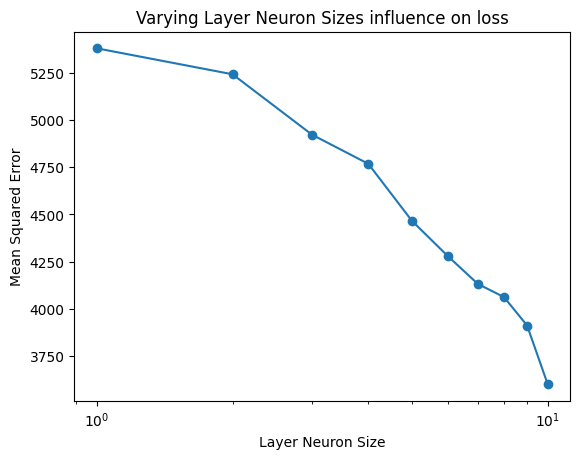

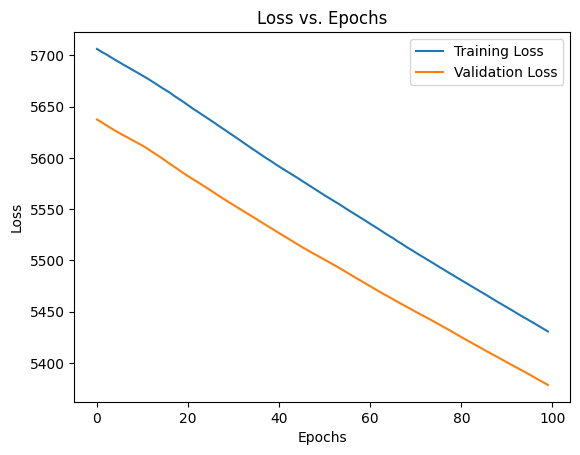

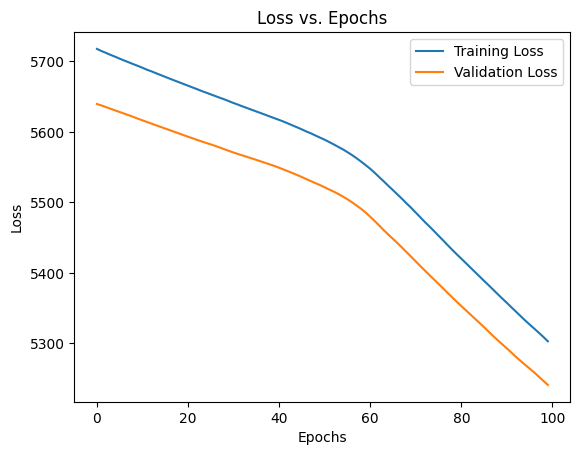

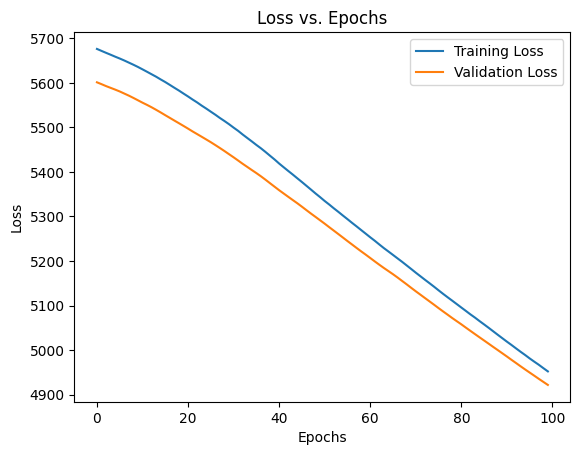

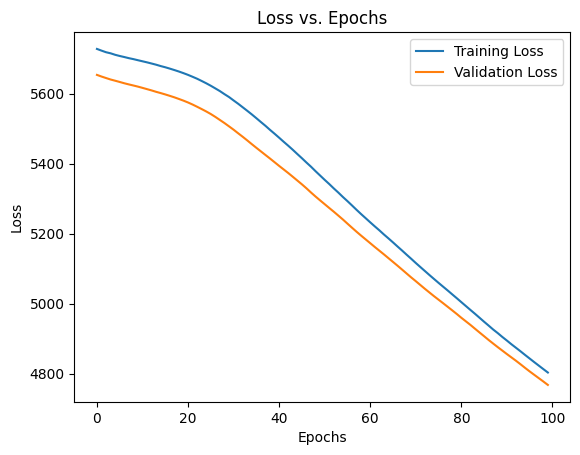

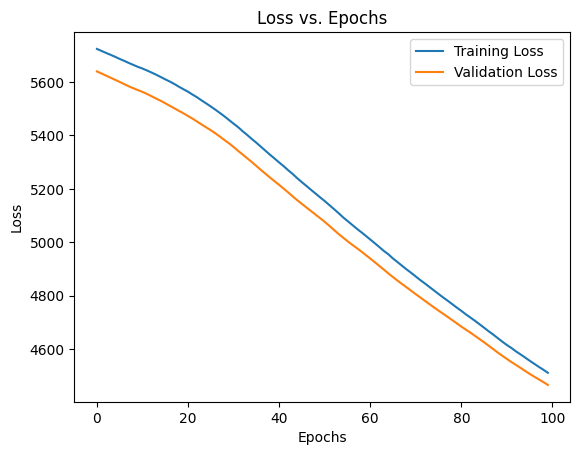

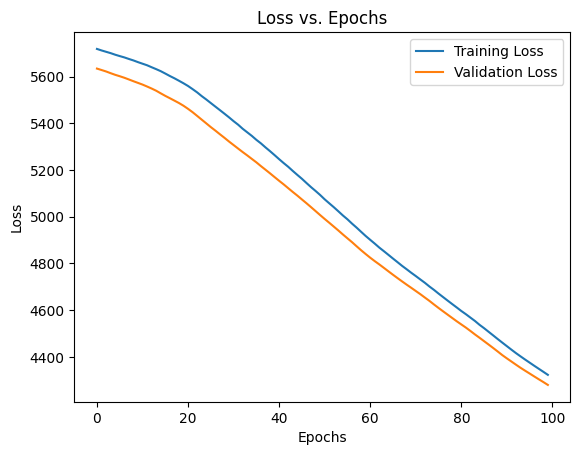

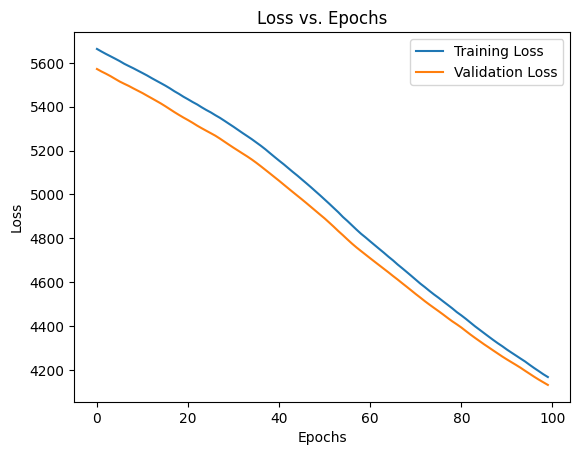

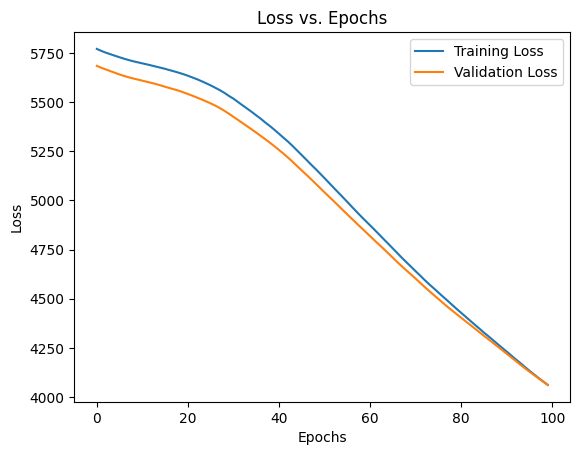

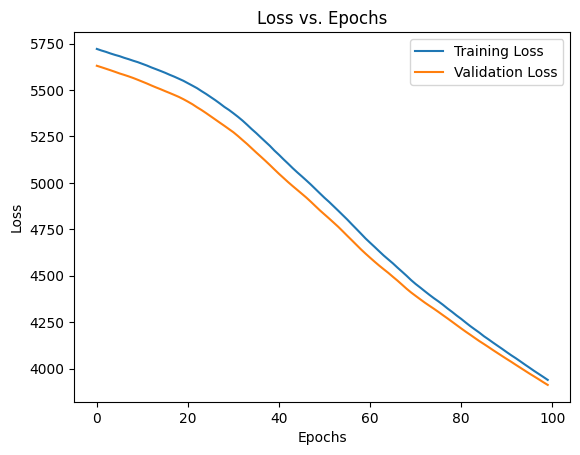

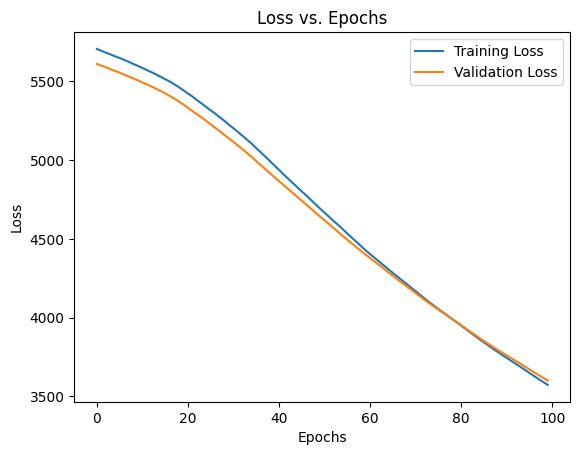

In [18]:
# Create the list of learning rates
neurons = range(1,11)

# Initialize the list to store the losses
nlosses = []
hist_vals = []

for n in neurons:
  neuron_model = Sequential()
  neuron_model.add(Dense(n, input_dim=X_train.shape[1], activation='sigmoid'))
  neuron_model.add(Dense(1))
  neuron_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
  hist = neuron_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))
  n_loss = neuron_model.evaluate(X_test, Y_test)
  nlosses.append(n_loss)
  hist_vals.append(hist)


plt.plot(neurons, nlosses, marker='o')
plt.title('Varying Layer Neuron Sizes influence on loss')
plt.xlabel('Layer Neuron Size')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

for h in hist_vals:
  plt.plot(h.history['loss'], label='Training Loss')
  plt.plot(h.history['val_loss'], label='Validation Loss')
  plt.title('Loss vs. Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


## Question 7 Code

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 5560.5059 - val_loss: 5648.7480
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5912.2471 - val_loss: 5624.1450
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5839.7324 - val_loss: 5607.4043
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5608.5942 - val_loss: 5583.2764
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5532.5103 - val_loss: 5555.7456
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5118.9185 - val_loss: 5530.8340
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4987.4780 - val_loss: 5503.3779
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5676.8247 - val_loss: 5475.7939
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5600.3789 - val_loss: 5447.9077
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5240.2837 - val_loss: 5416.4048
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5586.5732 - val_loss: 5378.4702
Epoch 12/100
4/4 ━━━

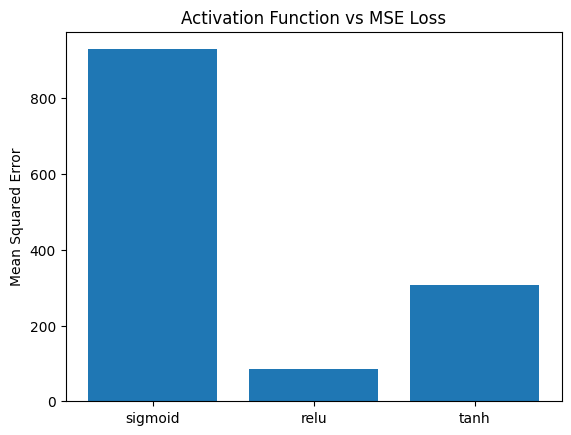

In [19]:
#

activations = ['sigmoid','relu', 'tanh']
act_losses = []

for a in activations:

  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation=a))
  model.add(Dense(1))
  model.compile(optimizer=Adam(learning_rate=.01), loss='mean_squared_error')
  model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))
  act_loss = model.evaluate(X_test, Y_test)
  act_losses.append(act_loss)

plt.bar(activations, act_losses)
plt.title('Activation Function vs MSE Loss')
plt.ylabel('Mean Squared Error')
plt.show()

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.5903 - val_loss: 0.7986
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5708 - val_loss: 0.7917
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0884 - val_loss: 0.8363
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5688 - val_loss: 0.9195
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1461 - val_loss: 0.9483
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5660 - val_loss: 0.9298
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0839 - val_loss: 0.9247
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4804 - val_loss: 0.9621
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.7136 - val_loss: 0.9933
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0279 - val_loss: 1.0159
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8250 - val_loss: 1.0055
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.2318 - val_lo

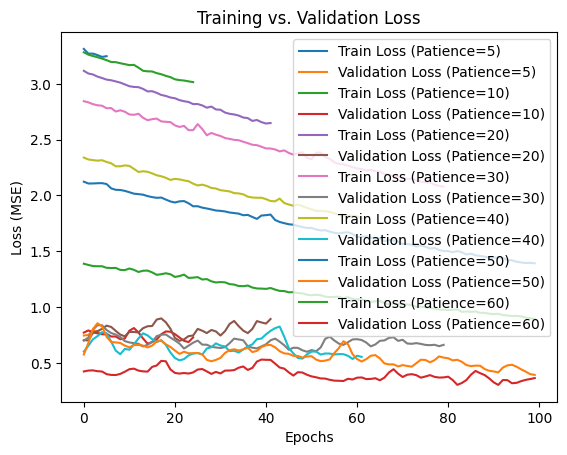

In [23]:
# Import early stopping
from tensorflow.keras.callbacks import EarlyStopping

# Split the data using 20% for validation
model_history = network_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

# Define early stopping with a patience level of 10
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the data with this early stopping implemented
model_history = network_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])



# Create a list of varying patience levels
patience = [5,10,20,30,40,50,60]

for p in patience:
  early_stop = EarlyStopping(monitor='val_loss', patience=p, restore_best_weights=True)
  model_history = network_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])
  plt.plot(model_history.history['loss'], label=f'Train Loss (Patience={p})')
  plt.plot(model_history.history['val_loss'], label=f'Validation Loss (Patience={p})')

plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.autoscale()
plt.show()




In [36]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential()
l2_model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid', kernel_regularizer=l2(0.01)))
l2_model.add(Dense(1))
l2_model.compile(optimizer=Adam(learning_rate=.01), loss='mean_squared_error')
# Train the model with L2 regularization and early stopping
history = l2_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

test1_loss = l2_model.evaluate(X_test, Y_test)

################################################################

es_model = Sequential()
es_model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
es_model.add(Dense(1))
es_model.compile(optimizer=Adam(learning_rate=.01), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the data with this early stopping implemented
model_history = es_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])


# Evaluate on the test data
test2_loss = es_model.evaluate(X_test, Y_test)



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6727.3857 - val_loss: 3337.2798
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6305.3838 - val_loss: 3344.8977
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6754.9580 - val_loss: 3351.8542
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6523.7461 - val_loss: 3358.7915
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6259.4023 - val_loss: 3368.6523
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6763.8862 - val_loss: 3376.8540
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6292.6650 - val_loss: 3386.4360
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6266.4902 - val_loss: 3392.9954
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6492.8828 - val_loss: 3400.1191
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5783.2637 - val_loss: 3407.9019
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5962.8848 - val_loss: 3414.6536
Epoch 1